# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Chengdong Huang
*   Your **student number**: 1000185881



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [554]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

**ANS: Stochastic Gradient Descent (SGD) - one epoch of SGD is when the model sees the whole dataset for n times (n is the total samples of the dataset) because each iteration will occur for each invidual sample, which is n times.**

**Mini-batch - the whole data set will divided by k times where k < n. So the iteration is k for one epoach. if there is remainder, it will be k+1 time for one epoach**

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [556]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [557]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Goal',1), df['Goal'],test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train,test_size=0.15/0.85, random_state=1)

In [558]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)
X_scaled_val=scaler.transform(X_val)

In [559]:
new_column_train=np.ones((X_scaled_train.shape[0],1))
new_column_val=np.ones((X_scaled_val.shape[0],1))
new_column_test=np.ones((X_scaled_test.shape[0],1))


In [560]:
X_scaled_train = np.hstack((new_column_train,X_scaled_train))
X_scaled_val=np.hstack((new_column_val,X_scaled_val))
X_scaled_test=np.hstack((new_column_test,X_scaled_test))

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [561]:
from scipy.linalg import inv
from sklearn.metrics import mean_squared_error

In [562]:
y_train_values=y_train.values
y_val_values=y_val.values

In [563]:
info1=inv(np.dot(X_scaled_train.T,X_scaled_train))
info2=np.dot(info1,X_scaled_train.T)
theta_train=np.dot(info2,y_train_values)

In [564]:
y_train_hat = np.dot(X_scaled_train,theta_train)
y_val_hat = np.dot(X_scaled_val,theta_train)

In [565]:
RMSE_train=np.sqrt(mean_squared_error(y_train_values,y_train_hat))
RMSE_val=np.sqrt(mean_squared_error(y_val_values,y_val_hat))

In [585]:
print('the direct solution of RMSE for training set is',RMSE_train)
print('the direct solution of RMSE for validation set is',RMSE_val)

the direct solution of RMSE for training set is 0.00017657933324950403
the direct solution of RMSE for validation set is 0.00017176607839507625


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**ANS- when the RMSE is high, both training and validation are underfit. When the RMSE is too low, both training and validation are overfit as the RMSE will not signaficantly decrease as epoach increase. The sweet spot occurs at the elbow**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

--- Total Training Time: 0.9834182262420654 (s) ---


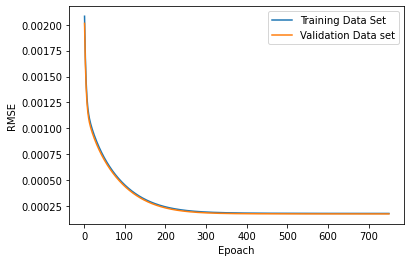

In [566]:
learn_rate=0.01
CT=1.001*RMSE_val
wt=np.random.rand(X_scaled_train.shape[1],1)/5000 #wt is in shape of nx1 so no need to transpose below#
sample_train=X_scaled_train.shape[0]
sample_val=X_scaled_val.shape[0]
RMSE_train_plot=[]
RMSE_val_plot=[]
RMSE_temp=2
i=0
epoach=[]
import time
start_time = time.time()
while RMSE_temp>CT:
  ytrain_hat_part3=np.dot(X_scaled_train,wt) #compute prediction for training set
  yval_hat_part3=np.dot(X_scaled_val,wt) #compute prediction for val set
  RMSE_temp_train=np.sqrt(mean_squared_error(y_train_values.reshape(-1,1),ytrain_hat_part3)) #compute error for training
  RMSE_temp=np.sqrt(mean_squared_error(y_val_values.reshape(-1,1),yval_hat_part3)) #compute error for val and also the threshold
  RMSE_train_plot.append(RMSE_temp_train)  #add values to RMSE_train list
  RMSE_val_plot.append(RMSE_temp)  #add values to RMSE_val list
  gd=(1/sample_train)*(np.dot(X_scaled_train.T,(ytrain_hat_part3-y_train_values.reshape(-1,1)))) #calculate the gradident 
  wt=wt-learn_rate*gd  #update the weight 
  i+=1
  epoach.append(i)

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

plt.plot(epoach,RMSE_train_plot,label='Training Data Set')
plt.plot(epoach,RMSE_val_plot,label='Validation Data set')
plt.xlabel("Epoach")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

**1. With smaller batch size, the solution cannot converge due to the fact the the RMSE is getting larger and larger. Clearly, assuming the initial weight are less than 0.001, any batch size below 64 will not converge. The code is designed to stop the training process when the RMSE go side way.**

**2. For those batch sizes which leads to converge, the # of epoach will increase as the batch size increases. However, it is not necessary that the RMSE can be reduced to the minimum as batch size goes up**

**3. The total training time will also increase as batch size increase**

In [567]:
def check_diverge (input_list,i):
  current=input_list[-1]
  last=input_list[-2]
  per=abs((current-last)/last)
  if per>3:    #if the per is 3 times larger than previous value, it deems to be considered diverge
    output=0
  else:  output=1  
  return output

In [568]:
def mini_batch (xtrain_data,ytrain_ori,xval_data,yval_ori,batch_size,lr,converge_threshold):
  ytrain=ytrain_ori.values.reshape(-1,1)
  yval=yval_ori.values.reshape(-1,1)
  k_iteration=len(xtrain_data)//batch_size
  last_iteration_size=len(xtrain_data)%batch_size
  wt_part4=np.random.rand(xtrain_data.shape[1],1)/5000 #wt is in shape of 41x1 so no need to transpose below#
  RMSE_part4_train=[]
  RMSE_part4_val=[]
  RMSE_temp_part4=2 #initial values for the loop 
  time_elapsed=[]
  i=0
  oktoloop=1

  import time
  start_time_part4 = time.time()
  while (RMSE_temp_part4>converge_threshold) and (oktoloop==1):
    m=0 #temp varibale for slicing in the training set, reset after each epoach
    n=1
    j=0
    for j in range(0,k_iteration):
      ytrain_hat_part4=np.dot(xtrain_data[m:batch_size*n,:],wt_part4)#compute prediction for training set, with up to batch size for X_train
      gd_part4=(1/batch_size)*np.dot((xtrain_data[m:batch_size*n,:]).T,(ytrain_hat_part4-ytrain[m:batch_size*n,:])) 
      #calculate the gradiden. The n is the batch size 
      wt_part4=wt_part4-lr*gd_part4  #update the weight
      m=m+batch_size
      n=n+1
    if last_iteration_size!=0:
      ytrain_hat_part4=np.dot(xtrain_data[-last_iteration_size:,:],wt_part4) #compute prediction for last set
      gd_part4=(1/last_iteration_size)*np.dot((xtrain_data[-last_iteration_size:,:]).T,(ytrain_hat_part4-ytrain[-last_iteration_size:,:])) 
      #calculate the gradiden. The n is the batch size 
      wt_part4=wt_part4-lr*gd_part4
    #for loop plus one last if statement is one epoach 
    i=i+1
    #calculating the RMSE for Validation after one epoach with the final wt at each epoach
    yval_hat_part4_final=np.dot(xval_data,wt_part4) #compute prediction for val set after the final wt tunned 
    RMSE_part4_val.append(np.sqrt(mean_squared_error(yval,yval_hat_part4_final)))
     #compute error for val and also the threshold #add values to RMSE val list
    #calculating the RMSE for Training 
    ytrain_hat_part4_final=np.dot(xtrain_data,wt_part4)
    RMSE_part4_train.append(np.sqrt(mean_squared_error(ytrain,ytrain_hat_part4_final))) #compute error for training#add values to RMSE_train list
    RMSE_temp_part4=np.sqrt(mean_squared_error(yval,yval_hat_part4_final))
  #checking the diverge or not 
    if i>3:
      oktoloop=check_diverge(RMSE_part4_train,i)
   # if oktoloop==1:
     # continue
    if oktoloop==0:
      conv=0 #return a value to tell if the batch is converge
      return wt_part4, RMSE_part4_train, RMSE_part4_val,time_elapsed,conv
    #capture the time_elasped
    time_elapsed.append(time.time()-start_time_part4)
    #shuffle the entire data before going to the next while loop 
    temp_fulldataset=np.hstack((xtrain_data,ytrain))
    shuffle=np.random.permutation(temp_fulldataset)
    xtrain_data=shuffle[:,:-1]
    ytrain=shuffle[:,-1].reshape(-1,1)
  conv=1

  return wt_part4, RMSE_part4_train, RMSE_part4_val,time_elapsed,conv

In [569]:
#sweep the values and storing to the list 

RMSE_val_info=[]
RMSE_train_info=[]
time_info=[]
converge_diverge=[]

#Sweep from 1,2,4,8,16,32,64,128,256,512, to 2^11=2048
for bz in [2**k for k in range(0,12)]:   
  return1,return2,return3,return4,return5= mini_batch(X_scaled_train,y_train,X_scaled_val,y_val,bz,0.01,1.001*RMSE_val)
  RMSE_val_info.append(return3)
  RMSE_train_info.append(return2)
  time_info.append(return4)
  converge_diverge.append(return5)

In [570]:
# the last six did converge
converge_diverge

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

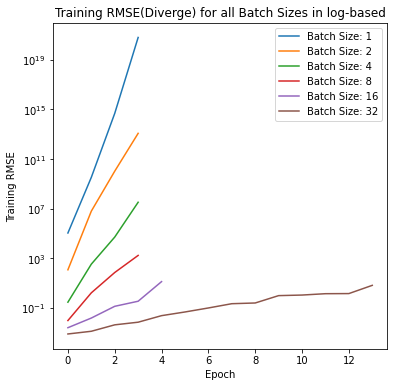

In [571]:
#Training RMSE vs Epoach 
# Demonstrade the Diverge case only
plt.figure(figsize=(6,6))
for i in range(0,12):
  if converge_diverge[i]==0:
    plt.plot(RMSE_train_info[i],label='Batch Size: %i'%(2**i))
    plt.yscale('log')
    plt.xlabel("Epoch")
    plt.ylabel("Training RMSE")
    plt.title("Training RMSE(Diverge) for all Batch Sizes in log-based")
    plt.legend()
    plt.show


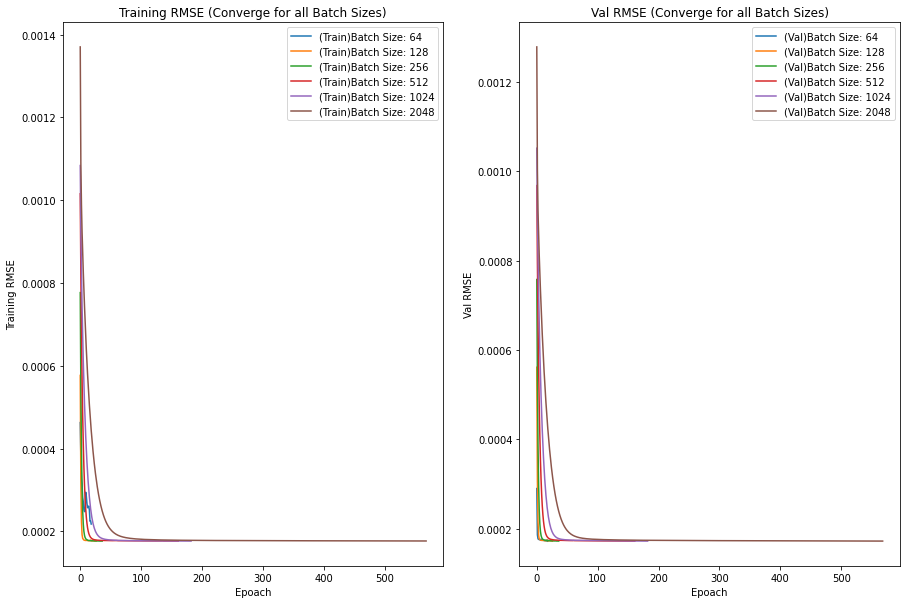

In [572]:
#Training/Val RMSE vs Epoach

fig, axes = plt.subplots(1, 2, figsize=(15,10))
for i in range(0,12):
  if converge_diverge[i]==1:
    axes[0].plot(RMSE_train_info[i],label='(Train)Batch Size: %i'%(2**i))
    axes[0].set_title("Training RMSE (Converge for all Batch Sizes)")
    axes[0].set_ylabel("Training RMSE")
    axes[0].set_xlabel("Epoach")
    axes[0].legend()

    axes[1].plot(RMSE_val_info[i],label='(Val)Batch Size: %i'%(2**i))
    axes[1].set_title("Val RMSE (Converge for all Batch Sizes)")
    axes[1].set_ylabel("Val RMSE")
    axes[1].set_xlabel("Epoach")
    axes[1].legend()



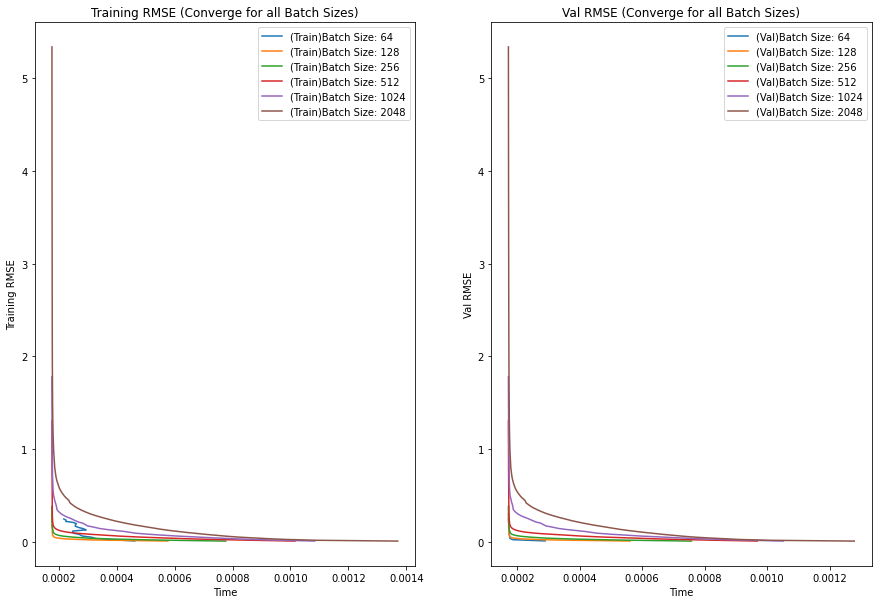

In [573]:
#Training/Val RMSE vs Time
fig, axes = plt.subplots(1, 2, figsize=(15,10))
for i in range(0,12):
  if converge_diverge[i]==1:
    axes[0].plot(RMSE_train_info[i],time_info[i],label='(Train)Batch Size: %i'%(2**i))
    axes[0].set_title("Training RMSE (Converge for all Batch Sizes)")
    axes[0].set_ylabel("Training RMSE")
    axes[0].set_xlabel("Time")
    axes[0].legend()
    
    axes[1].plot(RMSE_val_info[i],time_info[i],label='(Val)Batch Size: %i'%(2**i))
    axes[1].set_title("Val RMSE (Converge for all Batch Sizes)")
    axes[1].set_ylabel("Val RMSE")
    axes[1].set_xlabel("Time")
    axes[1].legend()

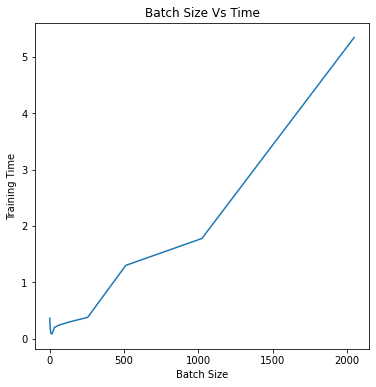

In [574]:
#Time vs Batch
bz_=[]
time_=[]
plt.figure(figsize=(6,6))
for i in range(0,12):
  bz_.append(2**i)
  time_.append(time_info[i][-1])
plt.plot(bz_,time_)
plt.xlabel("Batch Size")
plt.ylabel("Training Time")
plt.title("Batch Size Vs Time")
plt.show()

## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**
  
  **ANS: based on the plot (Beta vs Total Training Time), it tunred out that the beta size will oscillate as size increase. However, there are some local minimum training time such as when beta is 0.2, 0.54 and 0.85(where the training time is about 0.5s). Also, without adding the momentum(beta is 0), the training time is about 1.77s so in general, the momentum can help to reduce the training time with proper beta values**

In [575]:
#Add momentum#
def mini_batch_momentum (xtrain_data,ytrain_ori,xval_data,yval_ori,batch_size,lr,converge_threshold,beta):
  ytrain=ytrain_ori.values.reshape(-1,1)
  yval=yval_ori.values.reshape(-1,1)
  k_iteration=len(xtrain_data)//batch_size
  last_iteration_size=len(xtrain_data)%batch_size
  wt_part4=np.random.rand(xtrain_data.shape[1],1)/5000 #wt is in shape of 41x1 so no need to transpose below#
  gd_part4=np.zeros(xtrain_data.shape[1]).reshape(-1,1) #intitial gd at t=0 is all 
  RMSE_part4_train=[]
  RMSE_part4_val=[]
  RMSE_temp_part4=2 #initial values for the loop 
  time_elapsed=[]
  i=0
  oktoloop=1

  import time
  start_time_part4 = time.time()
  while (RMSE_temp_part4>converge_threshold) and (oktoloop==1):
    m=0 #temp varibale for slicing in the training set, reset after each epoach
    n=1
    j=0
    for j in range(0,k_iteration):
      ytrain_hat_part4=np.dot(xtrain_data[m:batch_size*n,:],wt_part4)#compute prediction for training set, with up to batch size for X_train
      gd_part4=beta*gd_part4+(1-beta)*((1/batch_size)*np.dot((xtrain_data[m:batch_size*n,:]).T,(ytrain_hat_part4-ytrain[m:batch_size*n,:])))
      #calculate the gradiden. The n is the batch size 
      wt_part4=wt_part4-lr*gd_part4  #update the weight
      m=m+batch_size
      n=n+1
    if last_iteration_size!=0:
      ytrain_hat_part4=np.dot(xtrain_data[-last_iteration_size:,:],wt_part4) #compute prediction for last set
      gd_part4=beta*gd_part4+(1-beta)*((1/last_iteration_size)*np.dot((xtrain_data[-last_iteration_size:,:]).T,(ytrain_hat_part4-ytrain[-last_iteration_size:,:]))) 
      #calculate the gradiden. The n is the batch size 
      wt_part4=wt_part4-lr*gd_part4
    #for loop plus one last if statement is one epoach 
    i=i+1
    #calculating the RMSE for Validation after one epoach with the final wt at each epoach
    yval_hat_part4_final=np.dot(xval_data,wt_part4) #compute prediction for val set after the final wt tunned 
    RMSE_part4_val.append(np.sqrt(mean_squared_error(yval,yval_hat_part4_final)))
     #compute error for val and also the threshold #add values to RMSE val list
    #calculating the RMSE for Training 
    ytrain_hat_part4_final=np.dot(xtrain_data,wt_part4)
    RMSE_part4_train.append(np.sqrt(mean_squared_error(ytrain,ytrain_hat_part4_final))) #compute error for training#add values to RMSE_train list
    RMSE_temp_part4=np.sqrt(mean_squared_error(yval,yval_hat_part4_final))
  #checking the diverge or not 
    if i>3:
      oktoloop=check_diverge(RMSE_part4_train,i)
   # if oktoloop==1:
     # continue
    if oktoloop==0:
      conv=0 #return a value to tell if the batch is converge
      return wt_part4, RMSE_part4_train, RMSE_part4_val,time_elapsed,conv
    #capture the time_elasped
    time_elapsed.append(time.time()-start_time_part4)
    #shuffle the entire data before going to the next while loop 
    temp_fulldataset=np.hstack((xtrain_data,ytrain))
    shuffle=np.random.permutation(temp_fulldataset)
    xtrain_data=shuffle[:,:-1]
    ytrain=shuffle[:,-1].reshape(-1,1)
  conv=1

  return wt_part4, RMSE_part4_train, RMSE_part4_val,time_elapsed,conv

In [576]:
#sweep the values and storing to the list 

RMSE_val_info1=[]
RMSE_train_info1=[]
time_info1=[]
converge_diverge1=[]
beta_step=np.linspace(0.05,1,50,endpoint=False)

#Sweep from 0.05 to 1 at step of 0.05, fix alpha is 0.01 and fix batch size is 1024(2^10)
for s in range(0,50):   
  return1_p5,return2_p5,return3_p5,return4_p5,return5_p5= mini_batch_momentum(X_scaled_train,y_train,X_scaled_val,y_val,1024,0.01,1.001*RMSE_val,beta_step[s])
  RMSE_val_info1.append(return3_p5)
  RMSE_train_info1.append(return2_p5)
  time_info1.append(return4_p5)
  converge_diverge1.append(return5_p5)

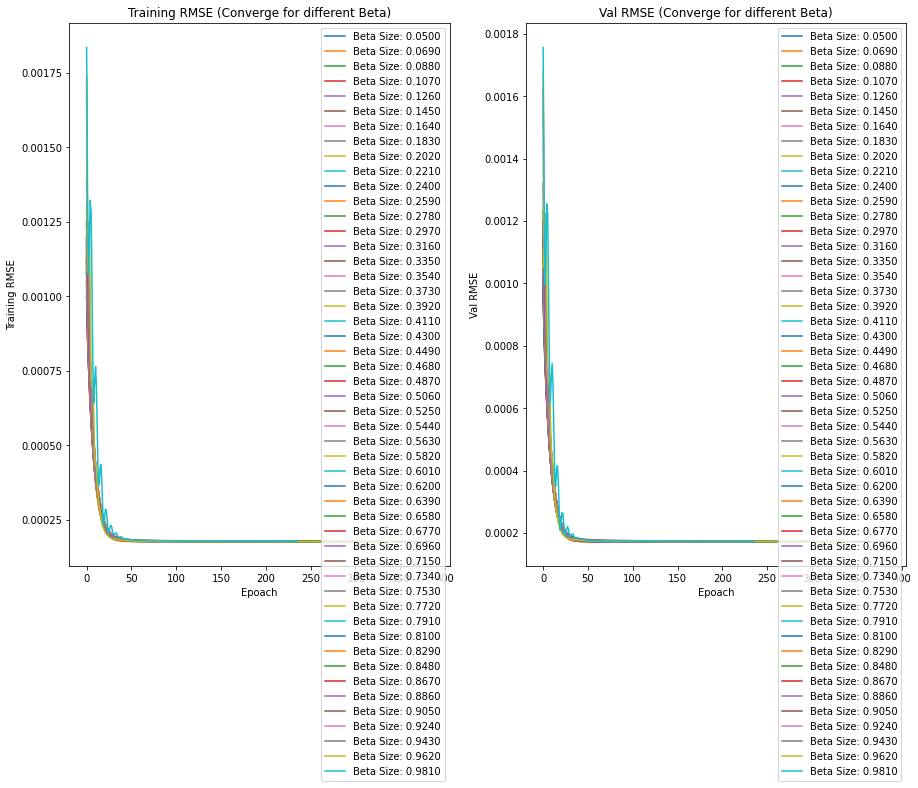

In [577]:
#Training/Val RMSE vs Epoach
fig, axes = plt.subplots(1, 2, figsize=(15,10))
for i in range(0,50):
    axes[0].plot(RMSE_train_info1[i],label='Beta Size: %.4f'%beta_step[:][i])
    axes[0].set_title("Training RMSE (Converge for different Beta)")
    axes[0].set_ylabel("Training RMSE")
    axes[0].set_xlabel("Epoach")
    axes[0].legend()

    axes[1].plot(RMSE_val_info1[i],label='Beta Size: %.4f'%beta_step[:][i])
    axes[1].set_title("Val RMSE (Converge for different Beta)")
    axes[1].set_ylabel("Val RMSE")
    axes[1].set_xlabel("Epoach")
    axes[1].legend()

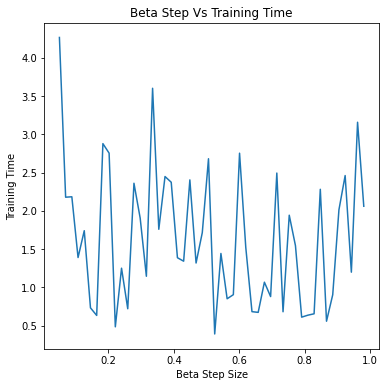

In [578]:
#Time vs Batch
time_part5=[]
plt.figure(figsize=(6,6))
for i in range(0,50):
  time_part5.append(time_info1[i][-1])
plt.plot(beta_step,time_part5)
plt.xlabel("Beta Step Size")
plt.ylabel("Training Time")
plt.title("Beta Step Vs Training Time")
plt.show()

In [579]:
# Training time when beta is 0 (Result from part 4)
time_info[10][-1]

1.777482509613037

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

**ANS- will choose beta to be 0.2 and alaph to be 0.01; Initial weight is 10000; batch size 128. The goal is to training the model as quickest as it could and predict the least RMSE value. So 128 is the best batch size to fit**

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

In [580]:
return1_p6,return2_p6,return3_p6,return4_p6,return5_p6= mini_batch_momentum(X_scaled_train,y_train,X_scaled_val,y_val,128,0.01,1.001*RMSE_val,0.2)


In [581]:
y_test_hat=np.dot(X_scaled_test,return1_p6)
RMSE_test=np.sqrt(mean_squared_error(y_test.values,y_test_hat))

In [582]:
name=df.columns
new_name=name.drop('Goal')
new_name1=new_name.insert(0,"error term")
ind={'Weight Terms'}

In [583]:
#after the tuning, the below table is the final weight terms for each feature
df_weight=pd.DataFrame(data=return1_p6.reshape(1,-1),index=ind,columns=new_name1)
df_weight

,error term,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
Weight Terms,-0.000873,0.000061,0.000004,-0.00013,0.000068,0.000077,-0.000081,0.000268,0.000018,0.000037,0.000029,-0.000029,-0.00003,0.000034,-0.000027,-0.000092,0.000066,-0.0001,0.000008,-0.000018,0.000041,-0.000025,-0.000036,0.000006,0.000014,-0.000002,0.000004,7.873786e-07,-0.000002,0.000001,0.000005,3.708747e-07,-0.000001,6.598828e-07,0.000002,0.000002,-0.000002,0.000004,8.894370e-07,-0.000006,-0.000036


In [584]:
print("the RMSE for the testing data set is ",RMSE_test,"\n"'the total training time to make the prediction is ',return4_p6[-1])

the RMSE for the testing data set is  0.00016899054725936745 
the total training time to make the prediction is  0.22667837142944336
